In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist    # Keras importa la base de datos MNIST
from keras.models import Sequential # Sequential sirve para declarar modelos neuronales
from keras.layers.core import Dense, Dropout, Activation # Funciones para declarar capas neuronales específicas 
from keras.utils import np_utils    # np_utils sirve para crear los vectores objetivo
from keras import optimizers
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


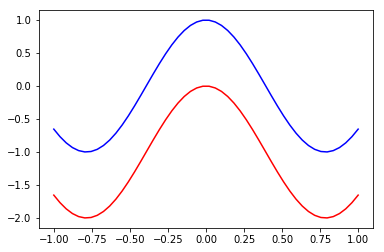

In [2]:
Npoints = 50
x = np.linspace(-1,1,Npoints)
y1 = np.cos(4*x)
y2 = np.cos(4*x)-1
plt.plot(x,y1,'b',x,y2,'r')
plt.show()

Xblue = np.vstack((x,y1)).T
Xred = np.vstack((x,y2)).T
X = np.vstack((Xblue,Xred))
yblue = np.ones(Npoints)
yred = np.zeros(Npoints)
Y = np.hstack((yblue,yred))


In [3]:
tlp = Sequential()
tlp.add(Dense(2, use_bias=True, activation='tanh', input_shape=(2,)))
tlp.add(Dense(1, use_bias=True, activation='sigmoid'))

In [5]:
model = tlp
adam = optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
h = model.fit(X, Y, batch_size=1000, epochs=80, verbose=1, validation_split=0.0, shuffle=True)


Epoch 1/80
100/100 [==============================] - 0s - loss: 0.2980 - acc: 0.7900
Epoch 2/80
100/100 [==============================] - 0s - loss: 0.3002 - acc: 0.7800
Epoch 3/80
100/100 [==============================] - 0s - loss: 0.2972 - acc: 0.8100
Epoch 4/80
100/100 [==============================] - 0s - loss: 0.2978 - acc: 0.7900
Epoch 5/80
100/100 [==============================] - 0s - loss: 0.2979 - acc: 0.7500
Epoch 6/80
100/100 [==============================] - 0s - loss: 0.2966 - acc: 0.7500
Epoch 7/80
100/100 [==============================] - 0s - loss: 0.2948 - acc: 0.7800
Epoch 8/80
100/100 [==============================] - 0s - loss: 0.2944 - acc: 0.7900
Epoch 9/80
100/100 [==============================] - 0s - loss: 0.2948 - acc: 0.8000
Epoch 10/80
100/100 [==============================] - 0s - loss: 0.2943 - acc: 0.8200
Epoch 11/80
100/100 [==============================] - 0s - loss: 0.2931 - acc: 0.8000
Epoch 12/80
100/100 [==============================]

In [6]:
hlayer = Sequential()
hlayer .add(Dense(2, use_bias=True, activation='tanh', input_shape=(2,), weights=model.layers[0].get_weights()))

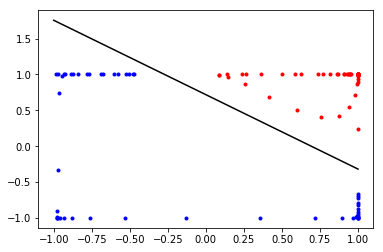

In [7]:
# Datos de entrenamientos transformados por la capa oculta y el hiperplano de la neurona de salida

xx = np.linspace(-1,1,100)
w2 = model.layers[1].get_weights()[0]
b2 = model.layers[1].get_weights()[1]
plt.plot(xx,(-w2[0][0]*xx - b2[0])/w2[1][0],'k')

y = hlayer.predict(X)
plt.plot(y[0:Npoints,0],y[0:Npoints,1],'b.',y[Npoints+1:,0],y[Npoints+1:,1],'r.')
plt.show()



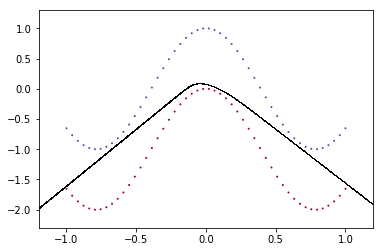

In [8]:
# Frontera de Decisión en el espacio de los datos de entrenamiento

def plot_decision_boundary(pred_func, X, Y, npts = 50):
    xmin, xmax = X[:, 0].min(), X[:, 0].max()
    ymin, ymax = X[:, 1].min(), X[:, 1].max()
    dx, dy = (xmax - xmin)*0.1, (ymax - ymin)*0.1
    xx, yy = np.meshgrid(np.linspace(xmin-dx, xmax+dx, npts), np.linspace(ymin-dy, ymax+dy, npts))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors='k', levels=[0.48, 0.52])
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral, s=1)

plot_decision_boundary(lambda x: model.predict(x), X, Y, 100) 
plt.show()

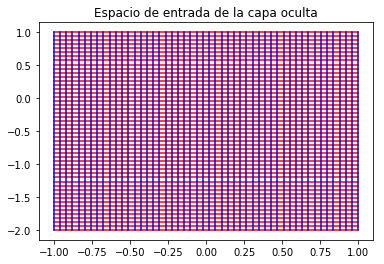

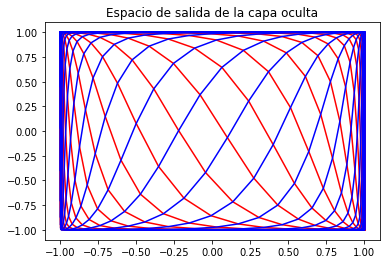

In [9]:
# Entendiendo la transformación de la capa oculta

no = 50
x = np.linspace(-1,1,no)
y = np.linspace(-2,1,no)


for i in range(x.shape[0]):
    xo = x
    yo = y[i]*np.ones(no)
    yh = hlayer.predict(np.vstack((xo,yo)).T)
    
    plt.figure(1)
    plt.plot(xo,yo,'r') 
    plt.figure(2)
    plt.plot(yh[:,0],yh[:,1],'r')
    
for j in range(y.shape[0]):
    xo = x[j]*np.ones(no)
    yo = y
    yh = hlayer.predict(np.vstack((xo,yo)).T)
    
    plt.figure(1)
    plt.plot(xo,yo,'b') 
    plt.figure(2)
    plt.plot(yh[:,0],yh[:,1],'b') 
    
plt.figure(1)
plt.title('Espacio de entrada de la capa oculta')
plt.figure(2)
plt.title('Espacio de salida de la capa oculta')
plt.show()